In [1]:
#Mining Twitter

In [2]:
#pip install twitter # library for using the twitter API

In [5]:
import twitter
help(twitter.Twitter)

Help on class Twitter in module twitter.api:

class Twitter(TwitterCall)
 |  The minimalist yet fully featured Twitter API class.
 |  
 |  Get RESTful data by accessing members of this class. The result
 |  is decoded python objects (lists and dicts).
 |  
 |  The Twitter API is documented at:
 |  
 |    http://dev.twitter.com/doc
 |  
 |  
 |  Examples::
 |  
 |      from twitter import *
 |  
 |      t = Twitter(
 |          auth=OAuth(token, token_key, con_secret, con_secret_key))
 |  
 |      # Get your "home" timeline
 |      t.statuses.home_timeline()
 |  
 |      # Get a particular friend's timeline
 |      t.statuses.user_timeline(screen_name="billybob")
 |  
 |      # to pass in GET/POST parameters, such as `count`
 |      t.statuses.home_timeline(count=5)
 |  
 |      # to pass in the GET/POST parameter `id` you need to use `_id`
 |      t.statuses.oembed(_id=1234567890)
 |  
 |      # Update your status
 |      t.statuses.update(
 |          status="Using @sixohsix's sweet P

<img src="images/book.png">

<img src="images/api1.png">

<img src="images/api2.png">

<img src="images/api3.png">

<img src="images/api4.png">

In [6]:
import twitter

# need access token from http://dev.twitter.com/apps/new

In [1]:
# setup handshake with API use your access info
CONSUMER_KEY = '' # add your auth info
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

In [19]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

In [20]:
twitter_api = twitter.Twitter(auth=auth)

In [21]:
# this creates a twitter api object that gives us access to the twitter API
print twitter_api

We can use the API to explore world wide trends across twitter using  
country codes that are available at  
http://developer.yahoo.com/geo/geoplanet

These focus can be at the level of the country (ie New Zealand is 23424916) or more locally (ie Palmy is 2350025)    

In [22]:
# World, USA and New Zealand trends
WORLD_WOE_ID = 1
US_WOE_ID = 23424977
NZ_WOE_ID = 23424916

In [33]:
# get the trends
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)
nz_trends = twitter_api.trends.place(_id=NZ_WOE_ID)

In [34]:
print world_trends

[{u'created_at': u'2017-02-02T19:33:53Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23%D8%A7%D9%84%D9%87%D9%84%D8%A7%D9%84_%D8%A7%D9%84%D9%82%D8%A7%D8%AF%D8%B3%D9%8A%D9%87', u'query': u'%23%D8%A7%D9%84%D9%87%D9%84%D8%A7%D9%84_%D8%A7%D9%84%D9%82%D8%A7%D8%AF%D8%B3%D9%8A%D9%87', u'tweet_volume': None, u'name': u'#\u0627\u0644\u0647\u0644\u0627\u0644_\u0627\u0644\u0642\u0627\u062f\u0633\u064a\u0647', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23GroundhogDay', u'query': u'%23GroundhogDay', u'tweet_volume': 137456, u'name': u'#GroundhogDay', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23BenimVatan%C4%B1m', u'query': u'%23BenimVatan%C4%B1m', u'tweet_volume': 27995, u'name': u'#BenimVatan\u0131m', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23%D8%A7%D9%83%D8%AB%D8%B1_%D8%B4%D9%8A%D8%A1_%D9%8A%D8%AC%D8%B0%D8%A8%D9%83_%D8%A8%D8%B4%D9%83%D9%84_%D8%A7%D9%84%D8%B1%D8%AC%D9%84', u'query': u'%23%D8%A7%D9%83%D8%AB%D8%B1

All that is happening here is that the API is performing a normal twitter search (ie http://twitter.com/search?q=) using a HTTP request, not really that much magic.

**Warning**: Twitter trends are limited to ~300 requests per minute window.

The output is in the form of nested python lists and dictionaries
**[** **{**u'created_at'**:** u'2017-02-02T18:58:51Z', u'trends'**:** **[** **{**u'url': u'http://twitter.com/search?q=%23%D8%A7%D9%84%D9%87%D9%84%D8%A7%D9%84_%D8%A7%D9%84%D9%82%D8%A7%D8%AF%D8%B3%D9%8A%D9%87',

These types of data structures are perfect for using the JSON format (JavaScript Object Notation), creates objects in attribute-value pairs. Data in JSON format is language agnostic in that many languages have built in parsers that will read JSON.  

In [25]:
# pythons JSON library
import json

print json.dumps(world_trends, indent=1)

[
 {
  "created_at": "2017-02-02T18:58:51Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23%D8%A7%D9%84%D9%87%D9%84%D8%A7%D9%84_%D8%A7%D9%84%D9%82%D8%A7%D8%AF%D8%B3%D9%8A%D9%87", 
    "query": "%23%D8%A7%D9%84%D9%87%D9%84%D8%A7%D9%84_%D8%A7%D9%84%D9%82%D8%A7%D8%AF%D8%B3%D9%8A%D9%87", 
    "tweet_volume": null, 
    "name": "#\u0627\u0644\u0647\u0644\u0627\u0644_\u0627\u0644\u0642\u0627\u062f\u0633\u064a\u0647", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23GroundhogDay", 
    "query": "%23GroundhogDay", 
    "tweet_volume": 131495, 
    "name": "#GroundhogDay", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23NaoMeDeOpiniaoMeDe", 
    "query": "%23NaoMeDeOpiniaoMeDe", 
    "tweet_volume": 15960, 
    "name": "#NaoMeDeOpiniaoMeDe", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23BenimVatan%C4%B1m", 
    "query": "%23BenimVatan%C4%B1m", 
    "tweet_volume": 185

In [29]:
# we can use pythons set data structure (unordered collection of 
# unique items)
cats = ["Toby", "Fred", "Spot", "Fred"]
dogs = ["Tom", "Spot", "Howard"]
cats = set(cats)
dogs = set(dogs)

In [30]:
print cats # Unique names
print dogs

set(['Spot', 'Toby', 'Fred'])
set(['Howard', 'Spot', 'Tom'])


In [31]:
# great for indentifying commonality/differences between
# collections of data
dogs.intersection(cats)

{'Spot'}

We will use *list comprehension* to *parse* out names and  
trending topics and *cast* them into *sets*.

Much time is spent converting from one data structure into another  
and/or cleaning [suboptimal] data so that it fits into our desired  
data structure.



In [35]:
# computing intersection of two sets of trends
world_trends_set = set([trend['name']
                       for trend in world_trends[0]['trends']])
us_trends_set = set([trend['name']
                     for trend in us_trends[0]['trends']])
nz_trends_set = set([trend['name']
                     for trend in nz_trends[0]['trends']])

In [36]:
common_trends = world_trends_set.intersection(us_trends_set)

In [37]:
print common_trends

set([u'Matthew McConaughey', u'#WhatBringsMeJoy', u'#KCAFavGlobalMusicStar', u'#ThursdayThoughts', u'#GroundhogDay', u'#RuVeal', u'Givenchy', u'#UnlimitedMoves'])


In [39]:
print world_trends_set.difference(us_trends_set)

set([u'#FillonCharleville', u'Loco Abreu', u'#\ubcf8\uc778\uc774_\uac70\uccd0\uc628_\ub355\uc9c8_\uacbd\ub85c\ub97c_\ub9d0\ud574\ubcf4\uc790', u'#MafiaSdvQueridoDiario', u'#\u062a\u0639\u0637\u0644_\u0645\u0648\u0642\u0639_\u062c\u0627\u0645\u0639\u0647_\u0627\u0644\u0627\u0645\u0627\u0645', u'DIRECTIONER ATTACK', u'#\u0627\u0644\u0647\u0644\u0627\u0644_\u0627\u0644\u0642\u0627\u062f\u0633\u064a\u0647', u'#FelizJueves', u'#ateema', u'Arnold Schwarzenegger', u'#KCAEstrellaLatina', u'#CMRGHA', u'#Romeo', u'EMILLY DESTRUIDORA', u'#HappyKyuhyunDay', u'#pelisconprecinto', u'#\u062a\u0641\u062a\u0643\u0631_\u0647\u0646\u0641\u0631\u062d_\u0627\u0645\u062a\u0647', u'#dividetour', u'#BolsonaroPresidenteDaCamara', u'#NaoMeDeOpiniaoMeDe', u'#D\xedaDeLaCandelaria', u'#\u0627\u0643\u062b\u0631_\u0634\u064a\u0621_\u064a\u062c\u0630\u0628\u0643_\u0628\u0634\u0643\u0644_\u0627\u0644\u0631\u062c\u0644', u'#\u0646\u0641\u0633\u0643_\u062a\u062c\u0631\u0628_\u0627\u064a\u0647', u'Od\xedn S\xe1nchez', u'

###Searching for tweets  
So it's groundhog day! Lets see what is going on with the hashtag  
#GroundhogDay


In [40]:
q = "#GroundhogDay"

count = 100

search_results = twitter_api.search.tweets(q=q, count=count)

In [41]:
statuses = search_results['statuses']

# iterate through 5 batches of these results
for _ in range(5):
    print "length of statuses", len(statuses)
    try:
        # this is actually a function call to the twitter API
        # asking for the next set of results
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e:
        # no more results
        break
        
    kwargs = dict([ kv.split('=') 
                   for kv in next_results[1:].split("&")])
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
# show one example by slicing a list
print json.dumps(statuses[0], indent=1)
    

length of statuses 100
length of statuses 200
length of statuses 200
{
 "contributors": null, 
 "truncated": false, 
 "text": "#GroundhogDay #yes https://t.co/GhjYslDijX", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 827248473607135234, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [], 
  "hashtags": [
   {
    "indices": [
     0, 
     13
    ], 
    "text": "GroundhogDay"
   }, 
   {
    "indices": [
     14, 
     18
    ], 
    "text": "yes"
   }
  ], 
  "urls": [], 
  "media": [
   {
    "expanded_url": "https://twitter.com/rachelherendeen/status/827248473607135234/photo/1", 
    "display_url": "pic.twitter.com/GhjYslDijX", 
    "url": "https://t.co/GhjYslDijX", 
    "media_url_https": "https://pbs.twimg.com/media/C3r6GRzWQAACAmL.jpg", 
    "id_str": "827248467340836864", 
    "sizes": {
     "large": {
      "h": 537, 
      "resize": "fit", 
      "w": 716
     }, 
     "small": {
      "h": 510, 
      "resize": "fit", 
   

<img src="images/gday1.png">

Although a tweet is only 40 characters long, the API has actually given   
us access to a wealth of other data about this tweet  
....  
"source": "<a href=\"http://twitter.com/download/iphone\"   rel=\"nofollow\">Twitter for iPhone</a>",  
...  
"retweet_count": 0,  
...  
"profile_image_url_https":   "https://pbs.twimg.com/profile_images/7990xxxx3703168/F_1vYVnt_normal.jpg"  
...    
"followers_count": 8,  
etc  


This metadata that comes with a tweet tells us something about  
the conversation

1)  How interesting this topic is (retweets and favourites)  
2)  Who sent the tweet and when   
3)  Did the author write this or just re-tweet  

In [ ]:
"text": "#GroundhogDay #yes https://t.co/GhjYslDijX", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 827248473607135234, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [], 
  "hashtags": [
   {
    "indices": [
     0, 
     13
    ], 
    "text": "GroundhogDay"
   }, 
   {
    "indices": [
     14, 
     18
    ], 
    "text": "yes"
   }
  ], 
  "urls": [], 
  "media": [.....

In [46]:
status_texts = [ status['text']
               for status in statuses]

screen_names = [ user_mention['screen_name']
               for status in statuses
                   for user_mention in status['entities']['user_mentions']]

hashtags = [ hashtag['text']
           for status in statuses
               for hashtag in status['entities']['hashtags']]

In [47]:
# collection of all words from all tweets
words = [w
        for t in status_texts
            for w in t.split()]

In [49]:
# explore the frist 5 items from each....
print "Status text"
print json.dumps(status_texts[0:5], indent=1)
print "Screen names"
print json.dumps(screen_names[0:5], indent=1)
print "hashtags"
print json.dumps(hashtags[0:5], indent=1)
print "words"
print json.dumps(words[0:5], indent=1)

Status text
[
 "#GroundhogDay #yes https://t.co/GhjYslDijX", 
 "Been so efficient clearing out years of paperwork, I have burnt out the shredder. Given what I found, great for #GroundhogDay #declutter", 
 "#ProfitBeforePatriotism\n#Trump &amp; GOP Block Legislation\nCoal Mines to Protect\nStreams&amp;Rivers\nWHO'S GONNA PAY\nAMERICA\u2026 https://t.co/KjWuA7rRwS", 
 "RT @accuchek_us: #SpareARose &amp; #GroundHogDay in the same post? Makes sense! As u think about 6 more wks of winter, consider giving 2 https:\u2026", 
 "RT @JaneSays10: American #Traitor @ChuckGrassley is the face of #treason.   #RussianHacking #FSB            #ThursdayThoughts #GroundhogDay\u2026"
]
Screen names
[
 "accuchek_us", 
 "JaneSays10", 
 "ChuckGrassley", 
 "RealVoodooTrump", 
 "MorrisAnimal"
]
hashtags
[
 "GroundhogDay", 
 "yes", 
 "GroundhogDay", 
 "declutter", 
 "ProfitBeforePatriotism"
]
words
[
 "#GroundhogDay", 
 "#yes", 
 "https://t.co/GhjYslDijX", 
 "Been", 
 "so"
]


But the above really is just getting a feel for the data  
as we just grabbed the first five random entries. We can use the  
*collections* library to carry out frequency analysis and look  
at the distributions as randked lists of terms. This will tell us  
"what people are talking about *now*"

In [50]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top ten
    print

[(u'#GroundhogDay', 148), (u'RT', 147), (u'of', 55), (u'the', 43), (u'is', 38), (u'more', 35), (u'a', 35), (u'to', 31), (u'weeks', 28), (u'you', 28)]

[(u'MarvelStudios', 11), (u'DrStrange', 11), (u'ElectricStarlet', 11), (u'NASASunEarth', 5), (u'PolToons', 4), (u'MLB_PLAYERS', 4), (u'MLBPAClubhouse', 4), (u'Wale', 4), (u'AUG_RickMcKee', 3), (u'ClimateReality', 3)]

[(u'GroundhogDay', 188), (u'Eclipse2017', 5), (u'Punxsutawneyphil', 5), (u'groundhogday', 5), (u'DemocratLiesMatter', 4), (u'DontGetFooledAgain', 4), (u'GroundHogDay', 4), (u'ThursdayThoughts', 4), (u'ThrowbackThursday', 4), (u'entry', 4)]



In [53]:
# lets look at this in a table using pyton!
from prettytable import PrettyTable

for label, data in (('Word', words),
                   ('Screen name', screen_names),
                   ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10]]
    # column and row alignment
    pt.align['label'], pt.align['Count'] = 'l', 'r'
    print pt

+---------------+-------+
|      Word     | Count |
+---------------+-------+
| #GroundhogDay |   148 |
|       RT      |   147 |
|       of      |    55 |
|      the      |    43 |
|       is      |    38 |
|      more     |    35 |
|       a       |    35 |
|       to      |    31 |
|     weeks     |    28 |
|      you      |    28 |
+---------------+-------+
+-----------------+-------+
|   Screen name   | Count |
+-----------------+-------+
|  MarvelStudios  |    11 |
|    DrStrange    |    11 |
| ElectricStarlet |    11 |
|   NASASunEarth  |     5 |
|     PolToons    |     4 |
|   MLB_PLAYERS   |     4 |
|  MLBPAClubhouse |     4 |
|       Wale      |     4 |
|  AUG_RickMcKee  |     3 |
|  ClimateReality |     3 |
+-----------------+-------+
+--------------------+-------+
|      Hashtag       | Count |
+--------------------+-------+
|    GroundhogDay    |   188 |
|    Eclipse2017     |     5 |
|  Punxsutawneyphil  |     5 |
|    groundhogday    |     5 |
| DemocratLiesMatter |     

In [2]:
# functions from the excellent book Mining the Social Web
# support the author by buying the book!

# http://shop.oreilly.com/product/0636920030195.do

import twitter
import time
import sys
from urllib2 import URLError
from httplib import BadStatusLine
import json

def oauth_login():
    # replace with your info
    CONSUMER_KEY = ''
    CONSUMER_SECRET = ''
    OAUTH_TOKEN = ''
    OAUTH_TOKEN_SECRET = ''
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY,
                               CONSUMER_SECRET)

    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api


def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw):
    
    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):
        
        if wait_period > 3600: #seconds
            print >> sys.stderr, 'Too many retires. Quiting'
            raise e
            
        if e.e.code == 401:
            print >> sys.stderr, 'Encountered 401 Error (not authorised)'
            return None
        elif e.e.code == 404:
            print >> sys.stderr, 'Encountered 404 Error (Not Found)'
            return None
        elif e.e.code == 429:
            print >> sys.stderr, 'Encountered 429 Error (rate limit Exceeded)'
            if sleep_when_rate_limited:
                print >> sys.stderr, "Retrying in 15 minutes ...ZzZ..."
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print >> sys.stderr, "...ZzZ...Awake now and trying again"
                return 2
            else:
                raise e # caller must handle the reate limiting issue
                
        elif e.e.code in (500, 502, 503, 504):
            print >> sys.stderr, 'Encountered %i Error. Retrying in %i seconds' % \
            (e.e.code, wait_period)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e
            
    # end of nested helper func
    
    wait_period = 2
    error_count = 0
    
    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError, e:
            error_count = 0
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError, e:
            error_count += 1
            print >> sys.stderr, "URLError encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "To many conseq errors .... bailing out"
                raise
            
    


def harvest_user_timeline(twitter_api, screen_name=None, 
                          user_id=None, max_results=1000):
    '''get 16 pages of tweets for a uers'''
    assert (screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"
    
    kw = { #keyword args for the twitter API callfn1
    'count': 200,
    'trim_user': 'true',
    'include_rts': 'true',
    'since_id': 1
    }
    
    if screen_name:
        kw['screen_name'] = screen_name
    else:
        kw['user_id'] = user_id
        
    max_pages = 16
    results = []
    
    tweets = make_twitter_request(twitter_api.statuses.user_timeline, **kw)
    
    if tweets is None:
        tweets = []
        
    results += tweets
    
    print >> sys.stderr, 'Fetched %i tweets' % len(tweets)
    
    page_num = 1
    
    if max_results == kw['count']:
        page_num = max_pages # prevent loop entry
        
    while page_num < max_pages and len(tweets) > 0 and len(results) < max_results:
        # need for twitter api 1.1
        # get the next q max-id param to pass in.
        # see https://dev.twitter.com/docs/working-with-timelines
        kw['max_id'] = min([ tweet['id'] for tweet in tweets]) - 1
        
        tweets = make_twitter_request(twitter_api.statuses.user_timeline, **kw)
        results += tweets
        
        print >> sys.stderr, 'Fetched %i tweets' % (len(tweets),)
        
        page_num += 1
        
    print >> sys.stderr, 'Done fetching tweets'
    
    return results[:max_results]


def twitter_search(twitter_api, q, max_results=200, **kw):
    '''Search twitter for given string, returns dict of tweetsfn1'''
    search_results = twitter_api.search.tweets(q=q, count=100, **kw)
    
    statuses = search_results['statuses']
    
    #enforce reasonable limit
    max_results = min(1000, max_results)
    
    for _ in range(10): #10*100 = 1000
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError, e:
            break
            
        kwargs = dict([kv.split('=')
                      for kv in next_results[1:].split("&")])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results:
            break
            
    return statuses


def extract_tweet_entities(statuses):
    '''extract screen names, hashtags, ursl, symbols from tweets'''
    if len(statuses) == 0:
        return [], [], [], [] , []
    
    screen_names = [ user_mention['screen_name']
                    for status in statuses
                    for user_mention in status['entities']['user_mentions']]
    
    hashtags = [hashtag['text'] 
                for status in statuses
                for hashtag in status['entities']['hashtags']]
    
    urls = [url['expanded_url']
           for status in statuses
           for url in status['entities']['urls']]

    
    symbols = [ symbol['text']
           for status in statuses
           for symbol in status['entities']['symbols']]
    
    
    media = []
    #if status['entities'].has_key('media'):
    #    media = [ media['url']
    #            for status in statuses
    #            for media in status['entities']['media']]
    #else:
    #    media = []
        
    return screen_names, hashtags, urls, symbols ,media

# q = 'crossfit'
#statuses = twitter_search(twitter_api, q)
#a,b,c,d,e = extract_tweet_entities(statuses)

#look at first 5 items
#print json.dumps(a[0:5], indent=1)


def analyze_tweet_content(statuses):
    '''Calc lexical diversity of a users tweets'''
    if len(statuses) == 0:
        print "No statuses to analyze"
        return
    
    # lexical diversity
    def lexical_diversity(tokens):
        return 1.0*len(set(tokens))/len(tokens)
    
    def average_words(statuses):
        total_words = sum([ len(s.split()) for s in statuses ])
        return 1.0*total_words/len(statuses)
    
    status_texts = [ status['text'] for status in statuses ]
    screen_names, hashtags, urls, media, _ = extract_tweet_entities(statuses)
    
    # compute a collection of all words from all tweets
    words = [ w
            for t in status_texts
            for w in t.split() ]
    
    print "Lexical diversity (words):", lexical_diversity(words)
    print "Lexical diversity (screen names):", lexical_diversity(screen_names)
    print "Lexical diversity (hashtags):", lexical_diversity(hashtags)
    print "Average words per tweet:", average_words(status_texts)
    
    

def save_to_jsonfile(data, fname):
    '''Helper function to save twitter data in json format'''
    obj = open(fname, 'wb')
    json.dump(data, obj)
    obj.close()

    
def load_from_jsonfile(fname):
    '''Helper function to load twitter data from json format'''
    obj = open(fname)
    data = json.load(obj)
    return data

#sample usage
#twitter_api = oauth_login()
#tweets = harvest_user_timeline(twitter_api, screen_name='MasseyUni', \
#                              max_results=200)
#obj = open('massey_data.txt', 'wb')
#json.dump(tweets, obj)
#obj.close()
#time.sleep(10)

Enough already! I thought we were going to talk about Donald Trump,  
I can't get enough of him!

In [56]:
# @realDonaldTrump
twitter_api = oauth_login()

trump_tweets = harvest_user_timeline(twitter_api, screen_name='realDonaldTrump', \
                               max_results=1000)
obj = open('trump_data.txt', 'wb')
json.dump(trump_tweets, obj)
obj.close()

# and lets not forget @BarackObama
obama_tweets = harvest_user_timeline(twitter_api, screen_name='BarackObama', \
                               max_results=1000)
obj = open('obama_data.txt', 'wb')
json.dump(obama_tweets, obj)
obj.close()

Fetched 200 tweets
Fetched 200 tweets
Fetched 200 tweets
Fetched 200 tweets
Fetched 200 tweets
Done fetching tweets
Fetched 200 tweets
Fetched 200 tweets
Fetched 200 tweets
Fetched 200 tweets
Fetched 200 tweets
Done fetching tweets


In [57]:
trump_tweets[0]

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Thu Feb 02 17:29:16 +0000 2017',
 u'entities': {u'hashtags': [],
  u'symbols': [],
  u'urls': [{u'display_url': u'axios.com/trump-effect-s\u2026',
    u'expanded_url': u'https://www.axios.com/trump-effect-samsung-may-build-u-s-factory-2233101986.html',
    u'indices': [48, 71],
    u'url': u'https://t.co/r5nxC9oOA4'}],
  u'user_mentions': [{u'id': 97610612,
    u'id_str': u'97610612',
    u'indices': [11, 19],
    u'name': u'samsung',
    u'screen_name': u'samsung'}]},
 u'favorite_count': 56583,
 u'favorited': False,
 u'geo': None,
 u'id': 827207267632164868,
 u'id_str': u'827207267632164868',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'is_quote_status': False,
 u'lang': u'en',
 u'place': None,
 u'possibly_sensitive': False,
 u'retweet_count': 12711,
 u'retweeted': False,
 u'source': u'<a href=

In [67]:
# Does Trump ever talk about Obama?
smtext = [status['text'] for status in trump_tweets
          for user_mention in status['entities']['user_mentions']
              if user_mention['screen_name']=='BarackObama']

In [68]:
smtext

[]

In [69]:
analyze_tweet_content(trump_tweets)

Lexical diversity (words): 0.32869508053
Lexical diversity (screen names): 0.360856269113
Lexical diversity (hashtags): 0.22602739726
Average words per tweet: 18.254


In [70]:
analyze_tweet_content(obama_tweets)

Lexical diversity (words): 0.284128185718
Lexical diversity (screen names): 0.235294117647
Lexical diversity (hashtags): 0.163751987281
Average words per tweet: 15.852


In [71]:
screen_names_t, hashtags_t, urls_t, media_t, symbols_t = extract_tweet_entities(trump_tweets)

In [72]:
screen_names_t, hashtags_o, urls_o, media_o, symbols_o = extract_tweet_entities(obama_tweets)

In [78]:
pt_trump = PrettyTable(field_names=['Hashtags','Count'])

counter_trump = Counter(hashtags_t)
[pt_trump.add_row(kv) for kv in counter_trump.most_common()[:10]]
pt_trump.align['Hashtags'], pt_trump.align['Count'] = 'l', 'r' # set column aln

print pt_trump


+-----------------------+-------+
| Hashtags              | Count |
+-----------------------+-------+
| DrainTheSwamp         |    78 |
| BigLeagueTruth        |    49 |
| MAGA                  |    45 |
| Debate                |    36 |
| ICYMI                 |    18 |
| MakeAmericaGreatAgain |    16 |
| CrookedHillary        |    16 |
| Debates               |    13 |
| ThankYouTour2016      |    12 |
| Debates2016           |    12 |
+-----------------------+-------+


In [81]:
pt_obama = PrettyTable(field_names=['Hashtags','Count'])

counter_obama = Counter(hashtags_o)
[pt_obama.add_row(kv) for kv in counter_obama.most_common()[:10]]
pt_obama.align['Hashtags'], pt_obama.align['Count'] = 'l', 'r' # set column aln

print pt_obama


+--------------+-------+
| Hashtags     | Count |
+--------------+-------+
| DoYourJob    |   150 |
| ActOnClimate |   101 |
| SOTU         |    63 |
| SCOTUS       |    46 |
| GetCovered   |    29 |
| Obamacare    |    23 |
| LoveIsLove   |    19 |
| DisarmHate   |    11 |
| LeadOnLeave  |    10 |
| WearOrange   |     8 |
+--------------+-------+


In [82]:
import numpy
def word_cloud(most_common):
    data = []
    
    for name, count in most_common:
        counter = 0
        while counter < count:
            data.append(name)
            counter+=1
                        
    return data    

In [83]:
trump_cloud = word_cloud(counter_trump.most_common()[1:21])
obama_cloud = word_cloud(counter_obama.most_common()[1:21])

In [88]:
# display images in notebook


with open('trump_cloud.txt', 'w') as f:
    [f.write(val+'\n') for val in trump_cloud]    

with open('obama_cloud.txt', 'w') as f:
    [f.write(val+'\n') for val in obama_cloud]
    


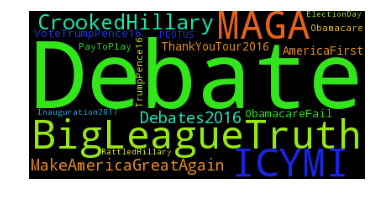

In [89]:
# Python rocks!
# pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ipython magic
%matplotlib inline  

# Read the whole text.
text = open('trump_cloud.txt').read()
wordcloud = WordCloud().generate(text)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

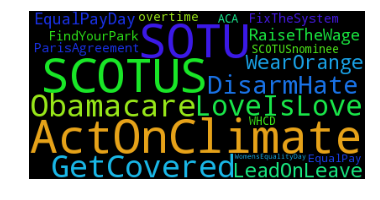

In [90]:
# Read the whole text.
text = open('obama_cloud.txt').read()
wordcloud = WordCloud().generate(text)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


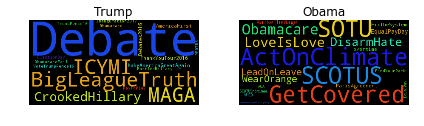

In [142]:
# put them all on one plot
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flat
tcloud = WordCloud().generate(open('trump_cloud.txt').read())
ocloud = WordCloud().generate(open('obama_cloud.txt').read())
ax0.imshow(tcloud)
ax0.set_title("Trump")
ax0.axis("off")
ax1.imshow(ocloud)
ax1.set_title("Obama")
ax1.axis("off")
fig.tight_layout()
fig.savefig("US pres.png")

What about our own politicans?  

In [95]:
import requests

In [98]:
#page = requests.get('https://national.org.nz/team')
#tree = html.fromstring()

In [99]:
from bs4 import BeautifulSoup

In [100]:
# save the nationsals page ('https://national.org.nz/team') to file using 
# an internet browser 
soup = BeautifulSoup(open('national.txt').read())

In [15]:
# All the names are in h3 HTML elements!
for h3 in soup.findAll("h3"):
    print repr(h3)

<h3>Rt Hon Bill English</h3>
<h3>Hon Paula Bennett</h3>
<h3>Hon Steven Joyce</h3>
<h3>Hon Gerry Brownlee</h3>
<h3>Hon Simon Bridges</h3>
<h3>Hon Amy Adams</h3>
<h3>Hon Dr Jonathan Coleman</h3>
<h3>Hon Christopher Finlayson</h3>
<h3>Hon Michael Woodhouse</h3>
<h3>Hon Anne Tolley</h3>
<h3>Hon Hekia Parata</h3>
<h3>Hon Nathan Guy</h3>
<h3>Hon Murray McCully</h3>
<h3>Hon Nikki Kaye</h3>
<h3>Hon Dr Nick Smith</h3>
<h3>Hon Judith Collins</h3>
<h3>Hon Todd McClay</h3>
<h3>Hon Maggie Barry</h3>
<h3>Hon Paul Goldsmith</h3>
<h3>Hon Louise Upston</h3>
<h3>Hon Alfred Ngaro</h3>
<h3>Hon Nicky Wagner</h3>
<h3>Hon Mark Mitchell</h3>
<h3>Hon Jacqui Dean</h3>
<h3>Hon David Bennett</h3>
<h3>Rt Hon David Carter</h3>
<h3>Hon Chester Borrows</h3>
<h3>Lindsay Tisch</h3>
<h3>Tim Macindoe</h3>
<h3>Jami-Lee Ross</h3>
<h3>Jo Hayes</h3>
<h3>Rt Hon John Key</h3>
<h3>Peseta Sam Lotu-Iiga</h3>
<h3>Craig Foss</h3>
<h3>Jo Goodhew</h3>
<h3>Melissa Lee</h3>
<h3>Kanwaljit Singh Bakshi</h3>
<h3>Dr Jian Yang</h3>
<h3>Hon 

In [101]:
national_members = []
for h3 in soup.findAll("h3"):
    national_members.append(h3.contents[0])
    

In [103]:
national_members[:10]

[u'Rt Hon Bill English',
 u'Hon Paula Bennett',
 u'Hon Steven Joyce',
 u'Hon Gerry Brownlee',
 u'Hon Simon Bridges',
 u'Hon Amy Adams',
 u'Hon Dr Jonathan Coleman',
 u'Hon Christopher Finlayson',
 u'Hon Michael Woodhouse',
 u'Hon Anne Tolley']

In [121]:
bill_tweets = harvest_user_timeline(twitter_api, screen_name='pmbillenglish', \
                               max_results=1000)
obj = open('bill_data.txt', 'wb')
json.dump(bill_tweets, obj)
obj.close()


Fetched 200 tweets
Fetched 200 tweets
Fetched 200 tweets
Fetched 68 tweets
Fetched 0 tweets
Done fetching tweets


In [122]:
screen_names_b, hashtags_b, urls_b, media_b, symbols_b = extract_tweet_entities(bill_tweets)

In [130]:
screen_names_b[:10]

[u'NZNationalParty',
 u'NZNationalParty',
 u'NZNationalParty',
 u'pmbillenglish',
 u'LiamMalone93',
 u'nikkikaye',
 u'stuartsmithmp',
 u'NZNationalParty',
 u'pmbillenglish',
 u'simonjbridges']

In [133]:
hashtags_b[:10]

[u'LISTEN',
 u'AUS',
 u'NZ',
 u'ANZIP',
 u'Townsville',
 u'Bainimarama',
 u'WaterfrontStadium',
 u'steakandcheese',
 u'economy',
 u'NZ']

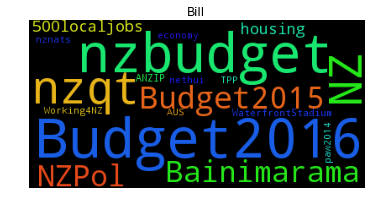

In [134]:
counter_bill = Counter(hashtags_b)
bill_cloud = word_cloud(counter_bill.most_common()[1:21])
with open('bill_cloud.txt', 'w') as f:
    [f.write(val+'\n') for val in bill_cloud] 

text = open('bill_cloud.txt').read()
wordcloud = WordCloud().generate(text)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Bill")
plt.show()

In [135]:
little_tweets = harvest_user_timeline(twitter_api, screen_name='AndrewLittleMP', \
                               max_results=1000)



Fetched 200 tweets
Fetched 200 tweets
Fetched 200 tweets
Fetched 200 tweets
Fetched 200 tweets
Done fetching tweets


In [136]:
obj = open('little_data.txt', 'wb')
json.dump(little_tweets, obj)
obj.close()

screen_names_l, hashtags_l, urls_l, media_l, symbols_l = extract_tweet_entities(little_tweets)

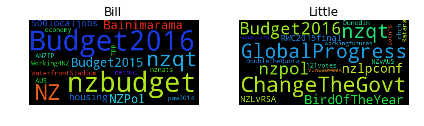

In [139]:
counter_little = Counter(hashtags_l)
little_cloud = word_cloud(counter_little.most_common()[1:21])
with open('little_cloud.txt', 'w') as f:
    [f.write(val+'\n') for val in little_cloud] 

fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flat
bcloud = WordCloud().generate(open('bill_cloud.txt').read())
lcloud = WordCloud().generate(open('little_cloud.txt').read())
ax0.imshow(bcloud)
ax0.set_title("Bill")
ax0.axis("off")
ax1.imshow(lcloud)
ax1.set_title("Little")
ax1.axis("off")
fig.tight_layout()

In [140]:
fig.savefig("NZ_leaders.png")

Finally myself! @dwheelerau

In [143]:
my_tweets = harvest_user_timeline(twitter_api, screen_name='dwheelerau', \
                               max_results=1000)

obj = open('my_data.txt', 'wb')
json.dump(my_tweets, obj)
obj.close()

Fetched 200 tweets
Fetched 198 tweets
Fetched 196 tweets
Fetched 199 tweets
Fetched 196 tweets
Fetched 200 tweets
Done fetching tweets


In [144]:
screen_names_dw, hashtags_dw, urls_dw, media_dw, symbols_dw = extract_tweet_entities(my_tweets)

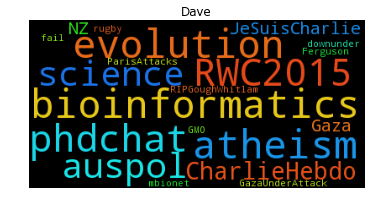

In [147]:
counter_dw = Counter(hashtags_dw)
dw_cloud = word_cloud(counter_dw.most_common()[1:21])
with open('dw_cloud.txt', 'w') as f:
    [f.write(val+'\n') for val in dw_cloud] 

text = open('dw_cloud.txt').read()
wordcloud = WordCloud().generate(text)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Dave")
plt.show()
fig.savefig("dave_clound.png")

To be fair these are not based on very big numbers  

In [150]:
pt_dw = PrettyTable(field_names=['Hashtags','Count'])

[pt_dw.add_row(kv) for kv in counter_dw.most_common()[:10]]
pt_dw.align['Hashtags'], pt_dw.align['Count'] = 'l', 'r' # set column aln

print pt_dw

+-----------------+-------+
| Hashtags        | Count |
+-----------------+-------+
| atheist         |     7 |
| bioinformatics  |     6 |
| phdchat         |     5 |
| evolution       |     5 |
| RWC2015         |     5 |
| atheism         |     5 |
| RIPGoughWhitlam |     4 |
| science         |     4 |
| JeSuisCharlie   |     4 |
| CharlieHebdo    |     4 |
+-----------------+-------+


In [ ]:
def extract_my_tweets(statuses):
    
    if len(statuses) == 0:
        return []
    
    followers = [ user_mention['screen_name']
                    for status in statuses
                    for user_mention in status['entities']['user_mentions']]
    
    return screen_names, hashtags, urls, symbols ,media


In [151]:
my_tweets[0]

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Wed Jan 11 20:11:43 +0000 2017',
 u'entities': {u'hashtags': [],
  u'symbols': [],
  u'urls': [{u'display_url': u'tylervigen.com/spurious-corre\u2026',
    u'expanded_url': u'http://tylervigen.com/spurious-correlations',
    u'indices': [27, 50],
    u'url': u'https://t.co/MZD142xemj'}],
  u'user_mentions': []},
 u'favorite_count': 0,
 u'favorited': False,
 u'geo': None,
 u'id': 819275618973925376,
 u'id_str': u'819275618973925376',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'is_quote_status': False,
 u'lang': u'en',
 u'place': {u'attributes': {},
  u'bounding_box': {u'coordinates': [[[175.497335, -40.529685],
     [175.790592, -40.529685],
     [175.790592, -40.268077],
     [175.497335, -40.268077]]],
   u'type': u'Polygon'},
  u'contained_within': [],
  u'country': u'New Zealand',
  u'countr

In [168]:
twitter_api = twitter.Twitter(auth=auth)



In [177]:
!mkdir following

In [3]:
# code from https://gist.githubusercontent.com/mjcreativeventures/41de04c6bbe47ee14411/raw/b6309a69f450bcee0b56804e593968c5b5c6386e/get_followers.py

import tweepy
import time
import os
import sys
import json
import argparse

FOLLOWING_DIR = 'following'
MAX_FRIENDS = 200
FRIENDS_OF_FRIENDS_LIMIT = 200

#if not os.path.exists(FOLLOWING_DIR):
#    os.makedir(FOLLOWING_DIR)

enc = lambda x: x.encode('ascii', errors='ignore')

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''

# == OAuth Authentication ==
#
# This mode of authentication is the new preferred way
# of authenticating with Twitter.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

def get_follower_ids(centre, max_depth=1, current_depth=0, taboo_list=[]):

    # print 'current depth: %d, max depth: %d' % (current_depth, max_depth)
    # print 'taboo list: ', ','.join([ str(i) for i in taboo_list ])

    if current_depth == max_depth:
        print 'out of depth'
        return taboo_list

    if centre in taboo_list:
        # we've been here before
        print 'Already been here.'
        return taboo_list
    else:
        taboo_list.append(centre)

    try:
        userfname = os.path.join('twitter-users', str(centre) + '.json')
        if not os.path.exists(userfname):
            print 'Retrieving user details for twitter id %s' % str(centre)
            while True:
                try:
                    user = api.get_user(centre)

                    d = {'name': user.name,
                         'screen_name': user.screen_name,
                         'id': user.id,
                         'friends_count': user.friends_count,
                         'followers_count': user.followers_count,
                         'followers_ids': user.followers_ids()}

                    with open(userfname, 'w') as outf:
                        outf.write(json.dumps(d, indent=1))

                    user = d
                    break
                except tweepy.TweepError, error:
                    print type(error)

                    if str(error) == 'Not authorized.':
                        print 'Can''t access user data - not authorized.'
                        return taboo_list

                    if str(error) == 'User has been suspended.':
                        print 'User suspended.'
                        return taboo_list

                    errorObj = error[0][0]

                    print errorObj

                    if errorObj['message'] == 'Rate limit exceeded':
                        print 'Rate limited. Sleeping for 15 minutes.'
                        time.sleep(15 * 60 + 15)
                        continue

                    return taboo_list
        else:
            user = json.loads(file(userfname).read())

        screen_name = enc(user['screen_name'])
        fname = os.path.join(FOLLOWING_DIR, screen_name + '.csv')
        friendids = []

        # only retrieve friends of TED... screen names
        if screen_name.startswith('TED'):
            if not os.path.exists(fname):
                print 'No cached data for screen name "%s"' % screen_name
                with open(fname, 'w') as outf:
                    params = (enc(user['name']), screen_name)
                    print 'Retrieving friends for user "%s" (%s)' % params

                    # page over friends
                    c = tweepy.Cursor(api.friends, id=user['id']).items()

                    friend_count = 0
                    while True:
                        try:
                            friend = c.next()
                            friendids.append(friend.id)
                            params = (friend.id, enc(friend.screen_name), enc(friend.name))
                            outf.write('%s\t%s\t%s\n' % params)
                            friend_count += 1
                            if friend_count >= MAX_FRIENDS:
                                print 'Reached max no. of friends for "%s".' % friend.screen_name
                                break
                        except tweepy.TweepError:
                            # hit rate limit, sleep for 15 minutes
                            print 'Rate limited. Sleeping for 15 minutes.'
                            time.sleep(15 * 60 + 15)
                            continue
                        except StopIteration:
                            break
            else:
                friendids = [int(line.strip().split('\t')[0]) for line in file(fname)]

            print 'Found %d friends for %s' % (len(friendids), screen_name)

            # get friends of friends
            cd = current_depth
            if cd+1 < max_depth:
                for fid in friendids[:FRIENDS_OF_FRIENDS_LIMIT]:
                    taboo_list = get_follower_ids(fid, max_depth=max_depth,
                        current_depth=cd+1, taboo_list=taboo_list)

            if cd+1 < max_depth and len(friendids) > FRIENDS_OF_FRIENDS_LIMIT:
                print 'Not all friends retrieved for %s.' % screen_name

    except Exception, error:
        print 'Error retrieving followers for user id: ', centre
        print error

        if os.path.exists(fname):
            os.remove(fname)
            print 'Removed file "%s".' % fname

        sys.exit(1)

    return taboo_list

'''
if __name__ == '__main__':
    ap = argparse.ArgumentParser()
    ap.add_argument("-s", "--screen-name", required=True, help="Screen name of twitter user")
    ap.add_argument("-d", "--depth", required=True, type=int, help="How far to follow user network")
    args = vars(ap.parse_args())

    twitter_screenname = args['screen_name']
    depth = int(args['depth'])

    if depth < 1 or depth > 3:
        print 'Depth value %d is not valid. Valid range is 1-3.' % depth
        sys.exit('Invalid depth argument.')

    print 'Max Depth: %d' % depth
    matches = api.lookup_users(screen_names=[twitter_screenname])

    if len(matches) == 1:
        print get_follower_ids(matches[0].id, max_depth=depth)
    else:
        print 'Sorry, could not find twitter user with screen name: %s' % twitter_screenname
'''        


ImportError: No module named tweepy

In [187]:
user = api.get_user('dwheelerau')

In [188]:
d = {'name': user.name,
     'screen_name': user.screen_name,
     'id': user.id,
     'friends_count': user.friends_count,
     'followers_count': user.followers_count,
     'followers_ids': user.followers_ids()}


In [190]:
with open('dw_followers.txt', 'w') as outf:
    outf.write(json.dumps(d, indent=1))

In [218]:
!head dw_followers.txt

{
 "name": "Dave Wheeler", 
 "friends_count": 293, 
 "followers_count": 270, 
 "followers_ids": [
  89715049, 
  825176793904726019, 
  2892117213, 
  117224557, 
  758039998386102276, 


In [222]:
d['followers_ids'][:10]

[89715049,
 825176793904726019,
 2892117213,
 117224557,
 758039998386102276,
 785322258935844864,
 798416960744779776,
 766970463427756032,
 794268670226669569,
 1858325484]

In [342]:
pt_loc = PrettyTable(field_names=['Place','County'])
locations = []
missing_count = 0
for follower in d['followers_ids']:
    user_info = twitter_api.users.lookup(user_id=follower)
    if user_info[0]['location']:
        loc = user_info[0]['location'].split(', ')
        if len(loc) == 2:
            locations.append(loc)
        elif len(loc) > 2:
            loc = user_info[0]['location'].split(', ')[:2]
            locations.append(loc)
        else:
            loc.append(" ")
            locations.append(loc)
    else:
        missing_count += 1
locations.append(["missing", missing_count])


In [344]:
[pt_loc.add_row(r) for r in locations]
print pt_loc

+-------------------------------+---------------------+
|             Place             |        County       |
+-------------------------------+---------------------+
|           Harrogate           |       England       |
|          Bloomington          |          IN         |
|            Varanasi           |        India        |
|         South Carolina        |         USA         |
|       Massey University       |                     |
|            Arizona            |                     |
|        Cornwall campus        |      Penryn UK      |
|           San Diego           |          CA         |
|            Norwich            |       England       |
|             Omaha             |          NE         |
|          New Zealand          |                     |
|            Auckland           |     New Zealand     |
|           Menlo Park          |          CA         |
|           Palo Alto           |          CA         |
|           Rochester           |          NY   

In [351]:
statuses = twitter_api.statuses.user_timeline(count = 200)

In [358]:
with open('timeline.txt', 'w') as f:
    for status in statuses:
        info = "%s\t%s\n" % (status['user']['location'], status['created_at'])
        f.write(info)        

In [359]:
!head timeline.txt

Palmerston north, New Zealand 	Wed Jan 11 20:11:43 +0000 2017
Palmerston north, New Zealand 	Sun Jan 08 02:07:11 +0000 2017
Palmerston north, New Zealand 	Wed Jan 04 07:27:33 +0000 2017
Palmerston north, New Zealand 	Wed Jan 04 07:23:08 +0000 2017
Palmerston north, New Zealand 	Thu Dec 29 02:51:10 +0000 2016
Palmerston north, New Zealand 	Tue Nov 29 10:01:22 +0000 2016
Palmerston north, New Zealand 	Mon Nov 28 09:37:22 +0000 2016
Palmerston north, New Zealand 	Sat Nov 26 06:46:20 +0000 2016
Palmerston north, New Zealand 	Sat Nov 26 06:14:34 +0000 2016
Palmerston north, New Zealand 	Sat Nov 26 00:57:10 +0000 2016


In [441]:
from pandas import DataFrame
import pandas as pd
df = DataFrame(pd.read_table('timeline.txt',names=['Place','Date_Time']))
df.head()

,Place,Date_Time
0,"Palmerston north, New Zealand",Wed Jan 11 20:11:43 +0000 2017
1,"Palmerston north, New Zealand",Sun Jan 08 02:07:11 +0000 2017
2,"Palmerston north, New Zealand",Wed Jan 04 07:27:33 +0000 2017
3,"Palmerston north, New Zealand",Wed Jan 04 07:23:08 +0000 2017
4,"Palmerston north, New Zealand",Thu Dec 29 02:51:10 +0000 2016


In [487]:
df.index= pd.to_datetime(df['Date_Time'])
df.head()

,Place,Date_Time,Date,year
Date_Time,,,,
2017-01-11 20:11:43,"Palmerston north, New Zealand",2017-01-11 20:11:43,2017-01-11 20:11:43,2017
2017-01-08 02:07:11,"Palmerston north, New Zealand",2017-01-08 02:07:11,2017-01-08 02:07:11,2017
2017-01-04 07:27:33,"Palmerston north, New Zealand",2017-01-04 07:27:33,2017-01-04 07:27:33,2017
2017-01-04 07:23:08,"Palmerston north, New Zealand",2017-01-04 07:23:08,2017-01-04 07:23:08,2017
2016-12-29 02:51:10,"Palmerston north, New Zealand",2016-12-29 02:51:10,2016-12-29 02:51:10,2016


In [471]:
pandas

,Place,Date_Time,Date,year
Date_Time,,,,
2017-01-11 20:11:43,"Palmerston north, New Zealand",2017-01-11 20:11:43,2017-01-11 20:11:43,2017
2017-01-08 02:07:11,"Palmerston north, New Zealand",2017-01-08 02:07:11,2017-01-08 02:07:11,2017
2017-01-04 07:27:33,"Palmerston north, New Zealand",2017-01-04 07:27:33,2017-01-04 07:27:33,2017
2017-01-04 07:23:08,"Palmerston north, New Zealand",2017-01-04 07:23:08,2017-01-04 07:23:08,2017
2016-12-29 02:51:10,"Palmerston north, New Zealand",2016-12-29 02:51:10,2016-12-29 02:51:10,2016


In [488]:
g = df.groupby('year')
g.size()

year
2015     84
2016    112
2017      4
dtype: int64

In [246]:
%run graph.py 'Australia'


This example has been updated to use Twitter's v1.1 API, which now requires authentication for *all* requests (amongst other things.) 

To run this example, you'll just need to go to http://twitter.com/apps/new to create an app and get authentication credentials that should be inserted into this file's source code. See https://dev.twitter.com/docs/auth/oauth for more information on Twitter's OAuth implementation
Number nodes: 602
Num edges: 439
Node degrees: [u'.@LloydRothwell', u'.@MZHemingway', u'.@SenJohnMcCain', u'0_Toole', u'5SOSChile', u'9562Debbie', u'ABCNews', u'ABWright824:', u'ALT_DOJ', u'AP', u'AP_Politics', u'Aargh4Shelly', u'Acosta', u'Admiral_224', u'AkiPeritz', u'AlbertBrooks', u'AlbertoSolis15', u'AlexisinNH', u'Ali_Star', u'AlsoWonderWoman', u'AmyMek', u'AndrewD_editor', u'Andy', u'AnewThomasPaine', u'AnonFamSheila', u'Antipaganda', u'AnySurvival', u'ArmyWife98', u'Art_Lilla_Music', u'ArtmanJanet', u'AshakaSaleh:', u'Asher_Wolf', u'AshleyC80839691', u'AsiaPolicy', u'Au